In [44]:
import sys
sys.path.insert(0,'/home/richard.brito/pEOBNRv2HM/opt/lib64/python2.7/site-packages/')

In [45]:
%matplotlib inline
import lalsimulation,lal
#help(lal)
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [46]:
# Define binary parameters
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
inclination = 0.
spin1_z = 0.5
spin2_z =  0.5
deltaT = 1./8192.

**Plot a single waveform**

/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in divide


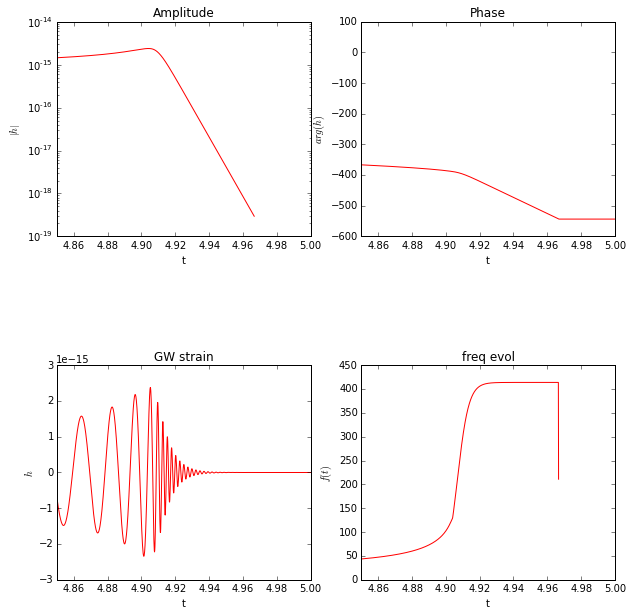

In [54]:
%matplotlib inline
plt.figure(figsize=(10,10))
i=0

paramdict = lal.CreateDict()

#add a deviation domega220=1.0
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, 1.0)

# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)

# Plot the waveform
plt.subplot(221)
plt.semilogy(time_array, np.abs(h), color='r')
plt.xlabel('t')
plt.ylabel('$|h|$')
plt.title('Amplitude')
plt.xlim([4.85, 5.])

plt.subplot(222)
plt.plot(time_array,np.unwrap(np.angle(h)), color='r')
plt.xlabel('t')
plt.ylabel('$arg(h)$')
plt.title('Phase')
plt.xlim([4.85, 5.])

plt.subplot(223)
plt.plot(time_array, np.real(h), color='r')
plt.xlabel('t')
plt.ylabel('$h$')
plt.xlabel('t')
plt.title('GW strain')
plt.xlim([4.85, 5.])
plt.subplots_adjust(hspace=0.6)

plt.subplot(224)
plt.plot(time_array, -np.imag(np.gradient(h,float(time_array[1]-time_array[0]))/h)/(2*np.pi), color='r')
plt.xlabel('t')
plt.ylabel('$f(t)$')
plt.xlabel('t')
plt.title('freq evol')
plt.xlim([4.85, 5.])

plt.subplots_adjust(hspace=0.6)
plt.show()

**Plotting a a bunch of waveforms: varying $d\omega_{220}$**

/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


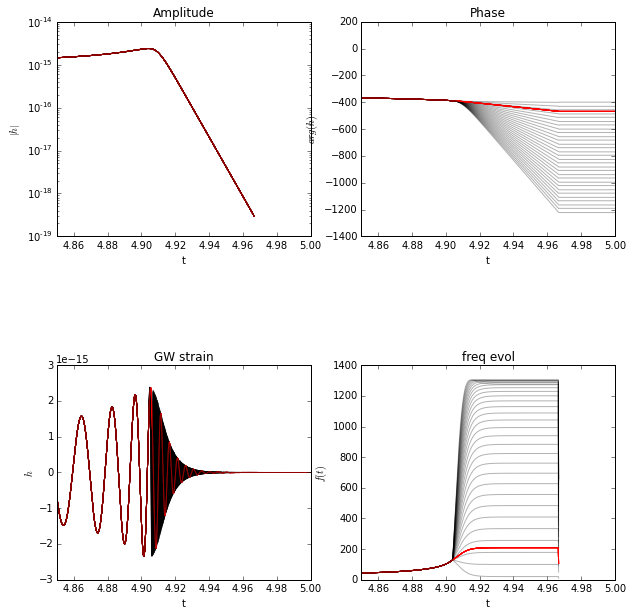

In [59]:
%matplotlib inline
delta_list = np.linspace(-0.9, 10, 30)
plt.figure(figsize=(10,10))
i=0

paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, 0.)
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
hGR = hp.data.data - 1j*hc.data.data
timeGR = np.arange(0,len(hGR)*deltaT,deltaT)

for delta in delta_list:

        paramdict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, delta)

        inclination = 0.

        hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)


        h = hp.data.data - 1j*hc.data.data
     
        ##time array
        time_array = np.arange(0,len(h)*deltaT,deltaT)
    
        # Plot the waveform
        plt.subplot(221)
        plt.semilogy(time_array, np.abs(h), color='k',alpha=0.3,label='non-GR')
        plt.semilogy(timeGR, np.abs(hGR), color='r',alpha=0.3,label='GR')
        plt.xlabel('t')
        plt.ylabel('$|h|$')
        plt.title('Amplitude')
        plt.xlim([4.85, 5.])
        #plt.ylim([5*10**(-16), 5*10**(-15)])
   
        plt.subplot(222)
        plt.plot(time_array,np.unwrap(np.angle(h)), color='k',alpha=0.3)
        plt.plot(timeGR, np.unwrap(np.angle(hGR)), color='r',alpha=0.3)
        plt.xlabel('t')
        plt.ylabel('$arg(h)$')
        plt.title('Phase')
        plt.xlim([4.85, 5.])

        plt.subplot(223)
        plt.plot(time_array, np.real(h), color='k',alpha=0.3)
        plt.plot(timeGR, np.real(hGR), color='r',alpha=0.3)
        plt.xlabel('t')
        plt.ylabel('$h$')
        plt.xlabel('t')
        plt.title('GW strain')
        plt.xlim([4.85, 5.])
      
        plt.subplots_adjust(hspace=0.6)
        plt.subplot(224)
        plt.plot(time_array, -np.imag(np.gradient(h,float(time_array[1]-time_array[0]))/h)/(2*np.pi), color='k',alpha=0.3)
        plt.plot(timeGR, -np.imag(np.gradient(hGR,float(timeGR[1]-timeGR[0]))/hGR)/(2*np.pi), color='r',alpha=0.3)
        plt.xlabel('t')
        plt.ylabel('$f(t)$')
        plt.xlabel('t')
        plt.title('freq evol')
        plt.xlim([4.85, 5.])
        #plt.ylim([0, 400])
        plt.subplots_adjust(hspace=0.6)
        plt.hold(True)
        
        i=i+1

plt.show()  

**Plotting a a bunch of waveforms: varying $d\tau_{220}$**

/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in divide
/opt/python2/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


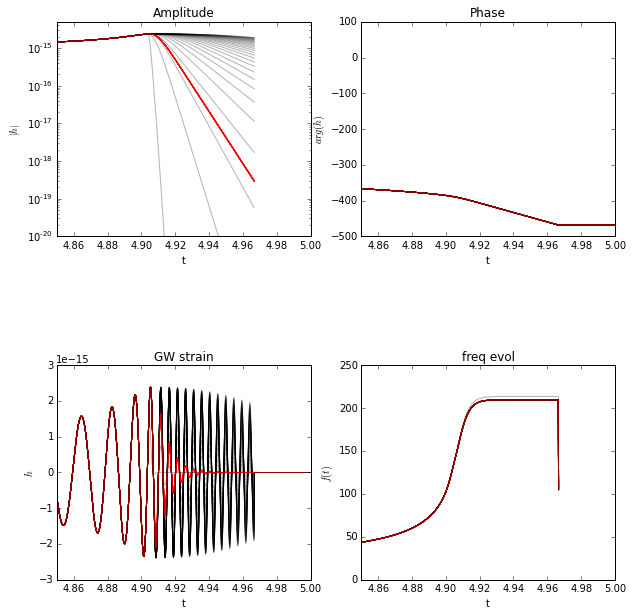

In [60]:
%matplotlib inline
delta_list = np.linspace(-0.9, 10, 30)
plt.figure(figsize=(10,10))
i=0

paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, 0.)
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
hGR = hp.data.data - 1j*hc.data.data
timeGR = np.arange(0,len(hGR)*deltaT,deltaT)

for delta in delta_list:

        paramdict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, delta)

        inclination = 0.

        hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)


        h = hp.data.data - 1j*hc.data.data
     
        ##time array
        time_array = np.arange(0,len(h)*deltaT,deltaT)
    
        # Plot the waveform
        plt.subplot(221)
        plt.semilogy(time_array, np.abs(h), color='k',alpha=0.3,label='non-GR')
        plt.semilogy(timeGR, np.abs(hGR), color='r',alpha=0.3,label='GR')
        plt.xlabel('t')
        plt.ylabel('$|h|$')
        plt.title('Amplitude')
        plt.xlim([4.85, 5.])
        plt.ylim([10**(-20), 5*10**(-15)])
   
        plt.subplot(222)
        plt.plot(time_array,np.unwrap(np.angle(h)), color='k',alpha=0.3)
        plt.plot(timeGR, np.unwrap(np.angle(hGR)), color='r',alpha=0.3)
        plt.xlabel('t')
        plt.ylabel('$arg(h)$')
        plt.title('Phase')
        plt.xlim([4.85, 5.])

        plt.subplot(223)
        plt.plot(time_array, np.real(h), color='k',alpha=0.3)
        plt.plot(timeGR, np.real(hGR), color='r',alpha=0.3)
        plt.xlabel('t')
        plt.ylabel('$h$')
        plt.xlabel('t')
        plt.title('GW strain')
        plt.xlim([4.85, 5.])
      
        plt.subplots_adjust(hspace=0.6)
        plt.subplot(224)
        plt.plot(time_array, -np.imag(np.gradient(h,float(time_array[1]-time_array[0]))/h)/(2*np.pi), color='k',alpha=0.3)
        plt.plot(timeGR, -np.imag(np.gradient(hGR,float(timeGR[1]-timeGR[0]))/hGR)/(2*np.pi), color='r',alpha=0.3)
        plt.xlabel('t')
        plt.ylabel('$f(t)$')
        plt.xlabel('t')
        plt.title('freq evol')
        plt.xlim([4.85, 5.])
        #plt.ylim([0, 400])
        plt.subplots_adjust(hspace=0.6)
        plt.hold(True)
        
        i=i+1

plt.show()  